In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import pandas as pd
from scipy.interpolate import interp1d

In [33]:
class Nervio:
    def __init__(self,num_fibras,diametro_nervio):
        self.cantidad_fibras = num_fibras
        self.diametro_nervio = diametro_nervio
        self.lista_fibras = []

    def distribucion_uniforme(self,semilla = None):
        np.random.seed(semilla)
        radio = self.diametro_nervio/2
        for i in range(self.cantidad_fibras):
            length = np.random.uniform(0,radio**2)
            angle = np.pi * np.random.uniform(0, 2) #de o a pi
            x = np.sqrt(length) * np.cos(angle)
            y = np.sqrt(length) * np.sin(angle)
            self.lista_fibras.append(Fibra(x,y))
    
    def distribucion_normal(self,semilla = None):
        np.random.seed(semilla)
        radio = self.diametro_nervio/2
        for i in range(self.cantidad_fibras):
            length = np.random.normal(0,radio)
            angle = np.pi * np.random.uniform(0, 2)
            while np.abs(length) > radio:
                length = np.random.normal(0,radio)
            x = length * np.cos(angle)
            y = length * np.sin(angle)
            self.lista_fibras.append(Fibra(x,y))
    
    def cargar_archivo(self,archivo):
        fibras = pd.read_csv(archivo)
        cantidad_fibras = len(fibras)
        for i in range(0,cantidad_fibras):
            x = fibras["x"][i]
            y = fibras["y"][i]
            self.lista_fibras.append(Fibra(x,y))
        self.cantidad_fibras = cantidad_fibras
    
    def ploteo_distribucion_fibras(self):
        lista_x = []
        lista_y = []
        for f in self.lista_fibras:
            x = f.x
            y = f.y
            lista_x.append(x)
            lista_y.append(y)
        plt.figure(figsize = (5,5))
        plt.plot(lista_x,lista_y,"r .")

class Fibra:
    def __init__(self,x,y):
        self.x = x
        self.y = y

class Electrodo:
    def __init__(self,x,y):
        self.x = x
        self.y = y
        self.dist_al_electrodo = []
    
    def distancia_al_electrodo_punto(self,lista_fibras: list[Fibra]):
        for f in lista_fibras:
            self.dist_al_electrodo.append(np.linalg.norm([f.x-self.x,f.y-self.y]))
    
    def distancia_al_electrodo_circulo(self,lista_fibras: list[Fibra],centro,radio):
        for fibra in lista_fibras:
            self.dist_al_electrodo.append(np.linalg.norm([fibra.x-centro[0],fibra.y-centro[1]])-radio)
    
    def distancia_al_electrodo_rectangulo(self,lista_fibras: list[Fibra],lado_rectangulo,diametro_nervio):
        A = np.array(-lado_rectangulo/2,diametro_nervio/2)
        B = np.array(lado_rectangulo/2,diametro_nervio/2)

from enum import Enum
class DistribucionNervio(Enum):
    uniforme = 'uniforme',
    gaussiana = 'gaussiana'

class Entorno:
    def __init__(self):
        self.nervio = None
        self.electrodos = []
    
    def crear_nervio(self,num_fibras,diametro_nervio,metodo_poblacion,semilla=None):
        self.nervio = Nervio(num_fibras,diametro_nervio)
        if metodo_poblacion == DistribucionNervio.uniforme.name:
            self.nervio.distribucion_uniforme(semilla)
        elif metodo_poblacion == DistribucionNervio.gaussiana.name:
            self.nervio.distribucion_normal(semilla)
        




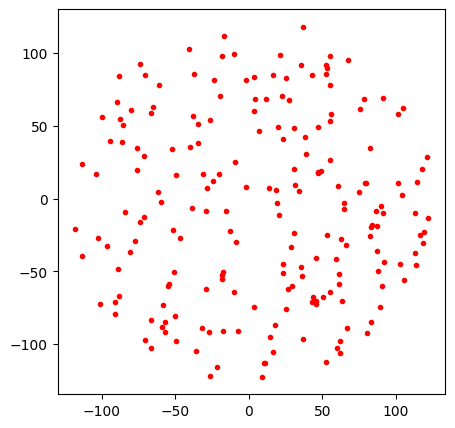

In [29]:
ne = Nervio(200,250)
ne.distribucion_uniforme()
ne.ploteo_distribucion_fibras()

In [30]:
e1 = Electrodo(0,-125)
e1.distancia_al_electrodo_circulo(ne.lista_fibras,[0,-130],5)

In [31]:
e1.dist_al_electrodo

[213.8851164752591,
 174.98166340652136,
 83.54750846419464,
 68.41190364038583,
 134.7259595370232,
 184.96790649682382,
 200.68044683916418,
 84.9968200885177,
 71.14549365534258,
 114.80638958376812,
 82.34785332404007,
 127.56382737384158,
 70.490989379968,
 75.24401837590955,
 198.67345538087565,
 163.46792189677865,
 148.98315019471556,
 194.69949372516987,
 63.53449360197759,
 186.36224832247015,
 224.9277589583135,
 123.00974647740995,
 14.97663940659778,
 80.85251660552538,
 226.75187152032953,
 149.66045116550515,
 101.47608930654495,
 155.00604990901053,
 142.60310040834713,
 206.54538959576212,
 229.4321255095207,
 47.203099832345735,
 76.41954741757253,
 76.83267344857721,
 38.91836505295876,
 171.7106989036975,
 225.05268964279014,
 123.6402159356897,
 212.1951461750195,
 214.38385809329102,
 89.14159113850351,
 115.23638386902803,
 208.92194645682792,
 118.16467991897366,
 176.80556782113283,
 114.95518628614099,
 219.83776110890827,
 179.10526152458849,
 42.164197079841